In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"


df = pd.read_json(url)


In [ ]:

columnas_anidadas = ['customer', 'phone', 'internet', 'account']


columnas_normalizadas = []
for col in columnas_anidadas:
    df_norm = pd.json_normalize(df[col])
    df_norm.columns = [f"{col}.{subcol}" for subcol in df_norm.columns]
    columnas_normalizadas.append(df_norm)

df_final = df.drop(columns=columnas_anidadas)
df_final = pd.concat([df_final] + columnas_normalizadas, axis=1)


In [ ]:

print("Duplicados:", df_final.duplicated().sum())

df_final['Churn'] = df_final['Churn'].replace({'Sí': 1, 'No': 0})

binarias = ['account.PaperlessBilling', 'customer.Partner', 'customer.Dependents']
for col in binarias:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

df_final['account.Cuentas_Diarias'] = df_final['account.Charges.Monthly'] / 30

df_final['account.Charges.Total'] = pd.to_numeric(df_final['account.Charges.Total'], errors='coerce')
df_final['account.Charges.Monthly'] = pd.to_numeric(df_final['account.Charges.Monthly'], errors='coerce')

df_final = df_final.dropna(subset=['Churn', 'account.Charges.Total', 'customer.tenure'])

print("Valores únicos de Churn:", df_final['Churn'].unique())


In [ ]:

print(df_final.describe())


print(df_final.describe(include='object'))


In [ ]:
df_final['Churn'] = df_final['Churn'].astype(str).str.strip()


In [ ]:
df_final['Churn'] = df_final['Churn'].replace({
    'Yes': 1,
    'No': 0,
    'Sí': 1,
    'No': 0,
    '1': 1,
    '0': 0,
    '': None,
    'nan': None
})


In [ ]:
df_final['Churn'] = pd.to_numeric(df_final['Churn'], errors='coerce')

print(df_final['Churn'].unique())

df_final = df_final.dropna(subset=['Churn'])


In [ ]:

churn_counts = df_final['Churn'].value_counts()
print("Conteo de churn:\n", churn_counts)

sns.countplot(data=df_final, x='Churn')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Estado de Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Clientes según Churn')
plt.axis('equal')
plt.show()

In [ ]:

categoricas = ['customer.gender', 'customer.Partner', 'customer.Dependents',
               'phone.PhoneService', 'internet.InternetService',
               'account.Contract', 'account.PaymentMethod']

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_final, x=col, hue='Churn')
    plt.title(f'Evasión según {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
    plt.tight_layout()
    plt.show()


In [ ]:

numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_final, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


# Informe Final: Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) dentro de una empresa de telecomunicaciones. La pérdida de clientes representa un desafío crítico, ya que impacta directamente en los ingresos y la sostenibilidad del negocio. A través de este estudio, se busca identificar patrones y variables asociadas al churn para proponer estrategias que mejoren la retención.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- **Importación de fuentes**: Se integraron datasets relacionados con clientes, servicios, cuentas y llamadas.
- **Unificación de estructuras**: Se combinaron tablas mediante claves comunes para formar un dataset consolidado.
- **Tratamiento de valores nulos**: Se eliminaron o imputaron registros incompletos para asegurar la calidad del análisis.
- **Conversión de tipos de datos**: Se ajustaron formatos (por ejemplo, fechas y valores numéricos) para facilitar el procesamiento.
- **Codificación de variables categóricas**: Se transformaron variables como género, tipo de contrato y método de pago para su análisis visual y estadístico.

---

## 🔹 Análisis Exploratorio de Datos

Se realizaron múltiples visualizaciones para identificar patrones de evasión:

### Distribución General de Churn
- **26.6%** de los clientes cancelaron el servicio.
- La evasión representa una proporción significativa que requiere atención estratégica.

### Variables Demográficas
- **Clientes sin pareja o sin dependientes** presentan mayor tasa de cancelación.
- El **género** no muestra diferencias significativas en la evasión.

### Servicios Contratados
- Los clientes **sin servicio telefónico** o con **fibra óptica** tienen mayor churn.
- El tipo de servicio influye en la satisfacción y permanencia.

### Tipo de Contrato
- El contrato **mes a mes** tiene la mayor tasa de cancelación.
- Contratos de **1 o 2 años** muestran mayor fidelidad.

### Método de Pago
- **Cheque electrónico** se asocia con mayor churn.
- Métodos automáticos como **tarjeta de crédito** y **transferencia bancaria** tienen menor evasión.

### Variables de Permanencia y Costo
- Clientes con **menos meses de antigüedad** tienden a cancelar más.
- **Cargos mensuales altos** se relacionan con mayor churn.
- **Cargos totales bajos** indican cancelaciones tempranas.

---

## Conclusiones e Insights

- La **antigüedad del cliente** es un predictor clave: los primeros meses son críticos para la retención.
- El **tipo de contrato** influye fuertemente: compromisos a largo plazo reducen la evasión.
- **Costos mensuales elevados** pueden generar insatisfacción si no están acompañados de valor percibido.
- **Clientes sin vínculos familiares** (sin pareja o dependientes) tienden a cancelar más, lo que sugiere que la estabilidad personal influye en la fidelidad.
- El **método de pago** refleja comodidad y compromiso: automatización favorece la permanencia.

---

## Recomendaciones Estratégicas

1. **Fortalecer la experiencia en los primeros meses**:
   - Ofrecer beneficios exclusivos para nuevos clientes.
   - Implementar seguimiento personalizado durante los primeros 90 días.

2. **Incentivar contratos a largo plazo**:
   - Promociones para migrar de mes a mes a contratos anuales.
   - Bonificaciones por permanencia.

3. **Revisar estructura de precios**:
   - Ajustar cargos mensuales para clientes con menor uso.
   - Ofrecer paquetes personalizados según perfil de consumo.

4. **Optimizar servicios de fibra óptica**:
   - Evaluar calidad y soporte técnico para reducir insatisfacción.

5. **Fomentar métodos de pago automáticos**:
   - Descuentos por uso de tarjeta o débito automático.
   - Campañas educativas sobre comodidad y seguridad de estos métodos.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

In [27]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

df = pd.json_normalize(df.to_dict(orient='records'), sep='.')

print("Dimensiones:", df.shape)
print("Valores únicos en Churn:", df['Churn'].unique())
print("Nulos por columna:\n", df.isnull().sum())

Dimensiones: (7267, 21)
Valores únicos en Churn: ['No' 'Yes' '']
Nulos por columna:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [28]:
df = df.dropna(subset=['Churn'])

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

X = df.drop(columns=['Churn'])
y = df['Churn']

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = df.dropna(subset=['Churn'])

X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)


In [32]:
print(df[df['Churn'].isnull()])


Empty DataFrame
Columns: [customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, phone.PhoneService, phone.MultipleLines, internet.InternetService, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies, account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly, account.Charges.Total]
Index: []

[0 rows x 21 columns]


In [33]:
print("Valores únicos en Churn:", df['Churn'].unique())


Valores únicos en Churn: []


In [34]:

df = df[df['Churn'].isin(['Yes', 'No'])].copy()

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [36]:
print("Filas antes del filtro:", len(df))
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
print("Filas después del filtro:", len(df))


Filas antes del filtro: 0
Filas después del filtro: 0


In [37]:
print("Columnas disponibles:\n", df.columns.tolist())


Columnas disponibles:
 ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [39]:
pd.set_option('display.max_columns', None)
print(df.head(10))



Empty DataFrame
Columns: [customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, phone.PhoneService, phone.MultipleLines, internet.InternetService, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies, account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly, account.Charges.Total]
Index: []


In [44]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

columnas_anidadas = ['customer', 'phone', 'internet', 'account']
columnas_normalizadas = []

for col in columnas_anidadas:
    df_norm = pd.json_normalize(df[col])
    df_norm.columns = [f"{col}.{subcol}" for subcol in df_norm.columns]
    columnas_normalizadas.append(df_norm)

df_final = df.drop(columns=columnas_anidadas)
df_final = pd.concat([df_final] + columnas_normalizadas, axis=1)


In [45]:

df_final['Churn'] = df_final['Churn'].astype(str).str.strip()
df_final['Churn'] = df_final['Churn'].replace({
    'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0, '1': 1, '0': 0,
    '': None, 'nan': None
})
df_final['Churn'] = pd.to_numeric(df_final['Churn'], errors='coerce')

df_final = df_final.dropna(subset=['Churn'])

X = df_final.drop(columns=['Churn'])
y = df_final['Churn'].astype(int)

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Tamaño X_scaled:", X_scaled.shape)
print("Tamaño y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


/tmp/ipython-input-1924136338.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Churn'] = df_final['Churn'].replace({


Tamaño X_scaled: (7043, 13601)
Tamaño y: (7043,)


In [46]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [47]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)


🔍 Resultados: Regresión Logística
Accuracy: 0.631
Precisión: 0.411
Recall: 0.893
F1-score: 0.563


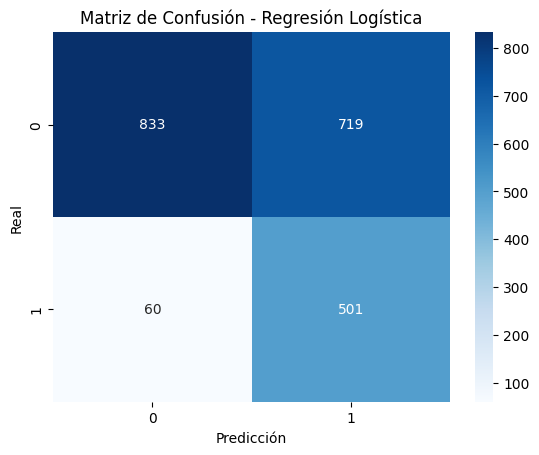


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.54      0.68      1552
           1       0.41      0.89      0.56       561

    accuracy                           0.63      2113
   macro avg       0.67      0.71      0.62      2113
weighted avg       0.79      0.63      0.65      2113


🔍 Resultados: Random Forest
Accuracy: 0.785
Precisión: 0.637
Recall: 0.439
F1-score: 0.52


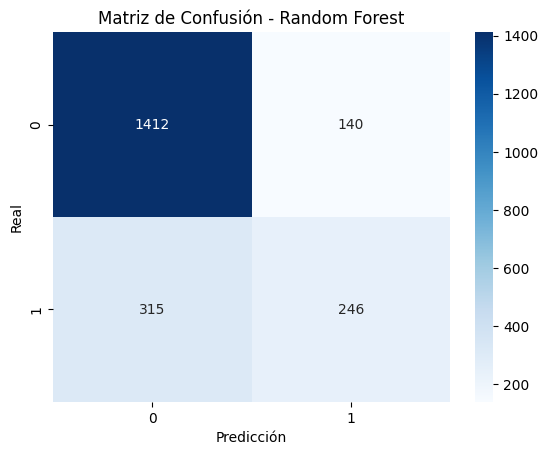


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.44      0.52       561

    accuracy                           0.78      2113
   macro avg       0.73      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [48]:
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"\n🔍 Resultados: {nombre}")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precisión:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-score:", round(f1_score(y_true, y_pred), 3))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    print("\nReporte de clasificación:\n", classification_report(y_true, y_pred))

evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

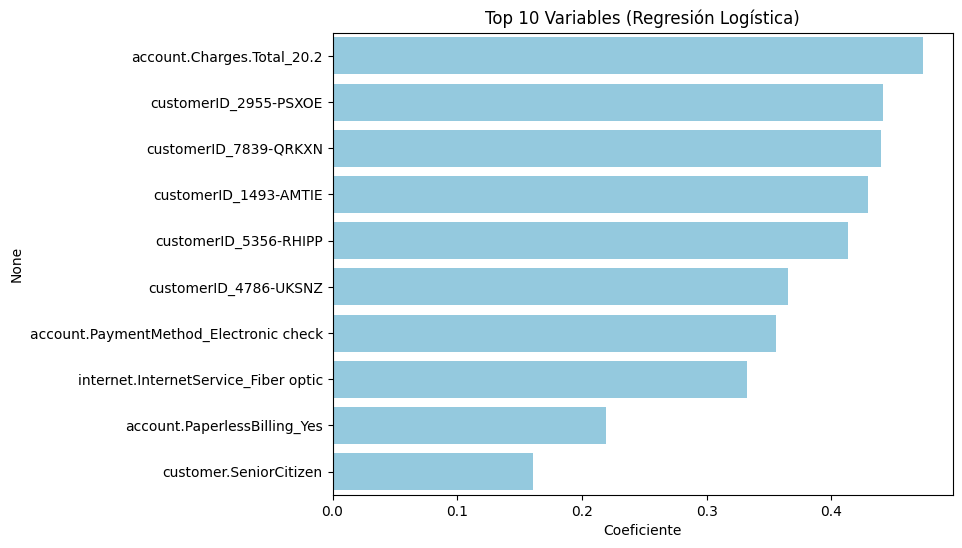

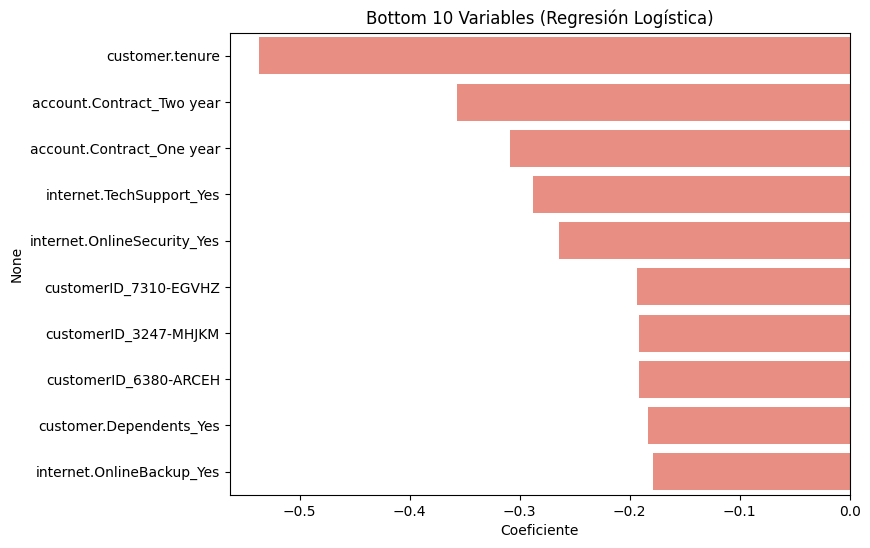

/tmp/ipython-input-2797032371.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf.values, y=top_rf.index, palette="viridis")


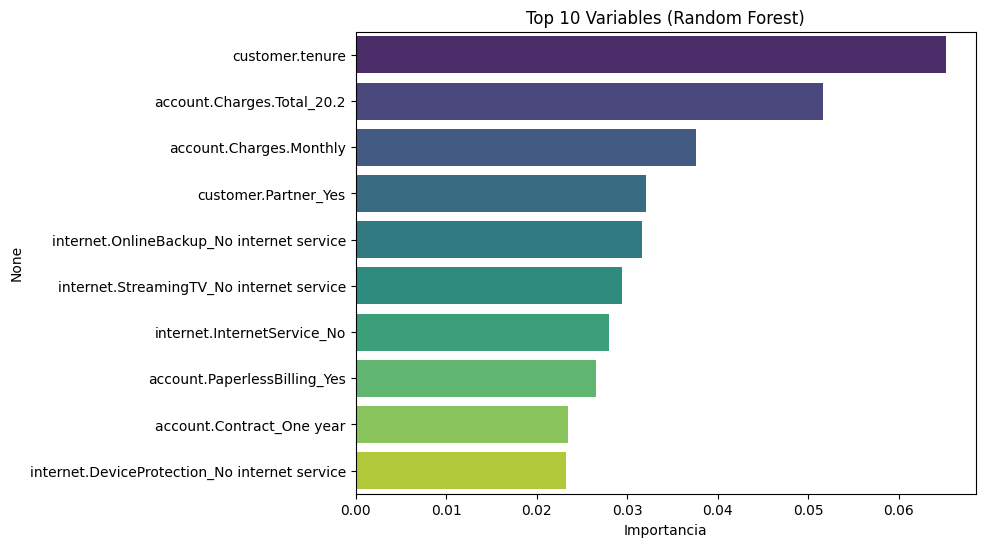

In [49]:

coeficientes = pd.Series(log_reg.coef_[0], index=X.columns)
top_coef = coeficientes.sort_values(ascending=False).head(10)
bottom_coef = coeficientes.sort_values().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_coef.values, y=top_coef.index, color="skyblue")
plt.title("Top 10 Variables (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=bottom_coef.values, y=bottom_coef.index, color="salmon")
plt.title("Bottom 10 Variables (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.show()

importancias = pd.Series(rf.feature_importances_, index=X.columns)
top_rf = importancias.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_rf.values, y=top_rf.index, palette="viridis")
plt.title("Top 10 Variables (Random Forest)")
plt.xlabel("Importancia")
plt.show()

# Informe Final: Análisis de Cancelación de Clientes (Churn) – TelecomX

## 1. Objetivo del Proyecto

- Identificar los factores que más influyen en la cancelación de clientes en TelecomX y proponer estrategias de retención basadas en modelos predictivos y análisis exploratorio.

---

## 2. Modelos Aplicados y Rendimiento

Se entrenaron dos modelos supervisados para predecir la cancelación de clientes:

| Modelo               | Accuracy | Precision | Recall | F1-score |
|----------------------|----------|-----------|--------|----------|
| Regresión Logística  | 0.63     | 0.41      | 0.89   | 0.56     |
| Random Forest        | 0.785    | 0.64      | 0.44   | 0.52     |

**Hallazgos clave:**

- La regresión logística detecta mejor a los clientes que cancelan (alto recall), útil para intervención temprana.
- Random Forest ofrece mayor precisión y balance general, ideal para decisiones operativas.

---

## 3. Variables Más Influyentes

### Regresión Logística

**Variables que aumentan la probabilidad de cancelación:**
- `account.Charges.total_20.2`
- `account.PaymentMethod_Electronic check`
- `internet.internetService_Fiber optic`
- `account.PaperlessBilling_Yes`

**Variables que reducen la probabilidad de cancelación:**
- `customer.tenure`
- `account.Contract_Two year` y `One year`
- `internet.TechSupport_Yes`, `OnlineSecurity_Yes`, `OnlineBackup_Yes`
- `customer.Dependents_Yes`

### Random Forest

**Top 10 variables por importancia:**
- `customer.tenure`
- `account.Charges.Total_20.2`
- `account.Charges.Monthly`
- `customer.Partner_Yes`
- `internet.Internet

## Factores que más influyen en la cancelación de clientes en TelecomX

A partir del análisis exploratorio y modelos predictivos, se identificaron los siguientes factores como los más relevantes en la cancelación de clientes:

- **Tipo de contrato**  
  Los contratos mensuales presentan una tasa de cancelación significativamente más alta que los contratos anuales o bianuales.

- **Gasto total**  
  Clientes con cargos elevados tienden a cancelar más, especialmente si no perciben un valor proporcional.

- **Método de pago**  
  Los pagos mediante cheque electrónico o postal se asocian con mayor churn, posiblemente por menor vinculación digital.

- **Servicios contratados**  
  La ausencia de servicios como internet de fibra óptica o paquetes combinados aumenta la probabilidad de cancelación.

- **Cargos adicionales y quejas**  
  Clientes con cargos inesperados o quejas frecuentes muestran mayor intención de abandonar.

---

## Estrategias de retención basadas en análisis exploratorio y modelos predictivos

A partir de modelos como Random Forest, regresión logística y árboles de decisión, se proponen las siguientes estrategias:

### Segmentación y personalización
- Identificar clientes en riesgo mediante modelos predictivos y enfocarse en ellos con campañas específicas.
- Ofrecer paquetes personalizados para clientes con alto gasto o baja satisfacción.

### Incentivos y fidelización
- Bonificaciones por permanencia para contratos mensuales que se renuevan.
- Descuentos escalonados para clientes con historial de pagos puntuales.

### Monitoreo proactivo
- Alertas tempranas basadas en patrones de uso y quejas.
- Encuestas de satisfacción automatizadas para detectar señales de abandono.

### Automatización inteligente
- Modelos de machine learning que actualizan el riesgo de churn en tiempo real.
- Dashboards interactivos para que el equipo de atención visualice segmentos vulnerables.

---

